In [24]:
import music21
from music21 import note
from music21 import stream
from music21 import *
import os
import numpy as np
from utils.conversions import *
from utils.manipulation import *
from utils.player import play_pitches
from data.txt_to_vector import *
from data.vector_to_str import *
exp_name = 'exp_8'
num = 0

def txt2music(ms):
    score=stream.Stream([])
    id=0
    while id < len(ms):
        key=ms[id]

        if key=="0":
            n=note.Rest()
            n.duration.quarterLength=0.5
            id+=1

            if id==len(ms):
                score.append(n)
                break

            while ms[id]=="-":
                n.duration.quarterLength+=0.5
                id+=1
                if id==len(ms):
                    score.append(n)
                    break
                
            score.append(n)

        else:
            n=note.Note(key) # 创建这个音
            n.duration.quarterLength=0.5
            id+=1

            if id==len(ms):
                score.append(n)
                break

            while ms[id]=="-":
                n.duration.quarterLength+=0.5
                id+=1
                if id==len(ms):
                    score.append(n)
                    break
            
            score.append(n)

    return score

In [25]:
# load results
population = np.load(os.path.join('experiments', exp_name, 'final_population.npy'))

In [26]:
print(single_vec_to_str(population[1]).split(" "))

['0', '-', '-', 'A4', 'F#4', 'G#3', '-', 'D4', 'A4', 'G4', 'G5', 'G5', 'F5', 'E5', 'D5', 'D5', 'D4', '-', 'A#3', 'A4', 'G#4', '-', '-', 'C#4', '-', '-', '-', 'C#4', 'A4', 'F#4', 'C#4', 'C#4']


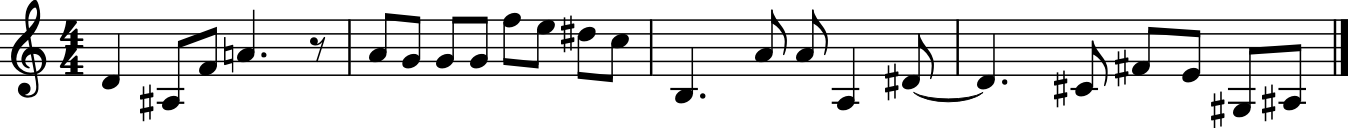

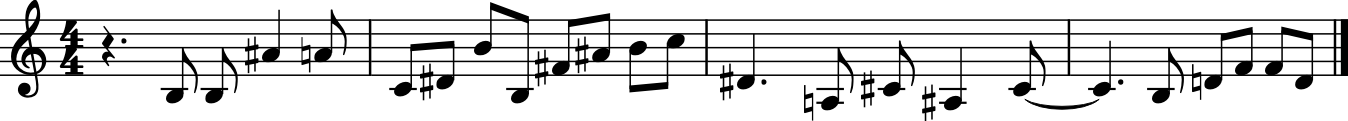

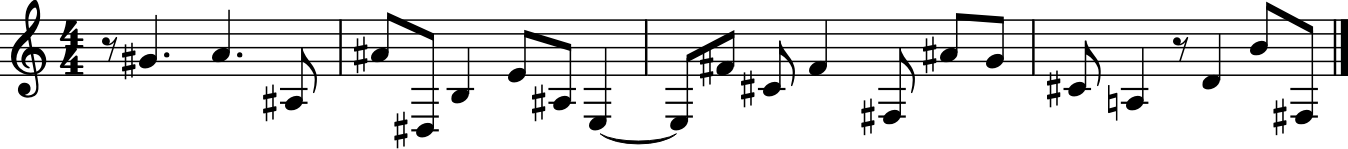

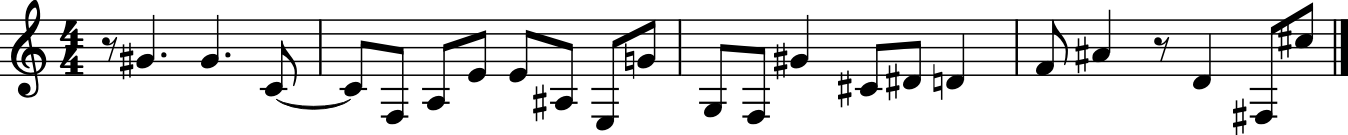

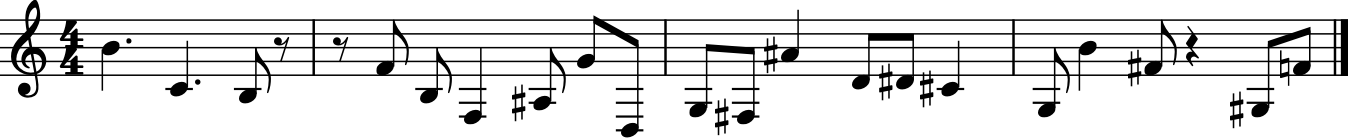

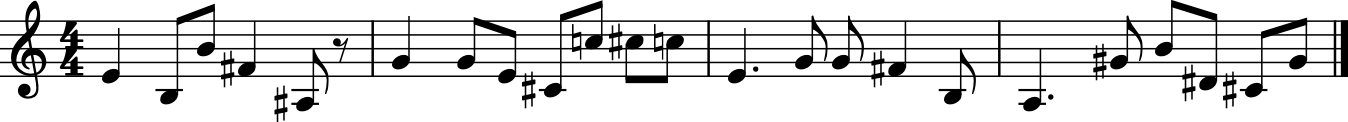

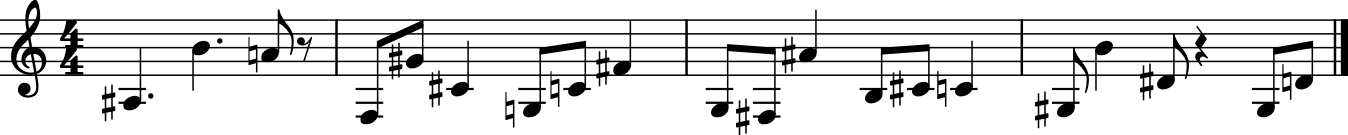

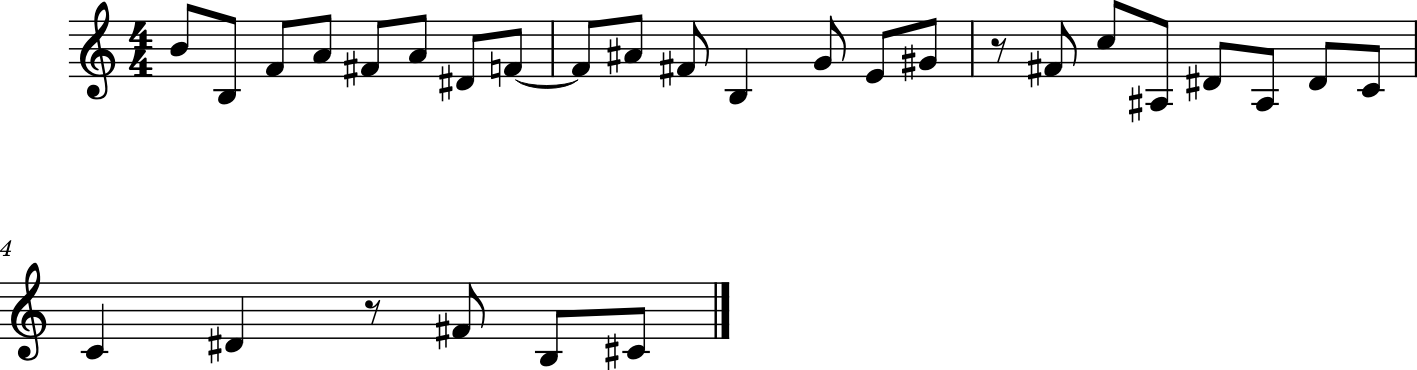

In [27]:
# convert format
for k in range(26,34):    
    ms=single_vec_to_str(population[k]).split(" ")
    score=txt2music(ms)

    score.show("midi")
    score.show()

(8, 32)
(3200,)


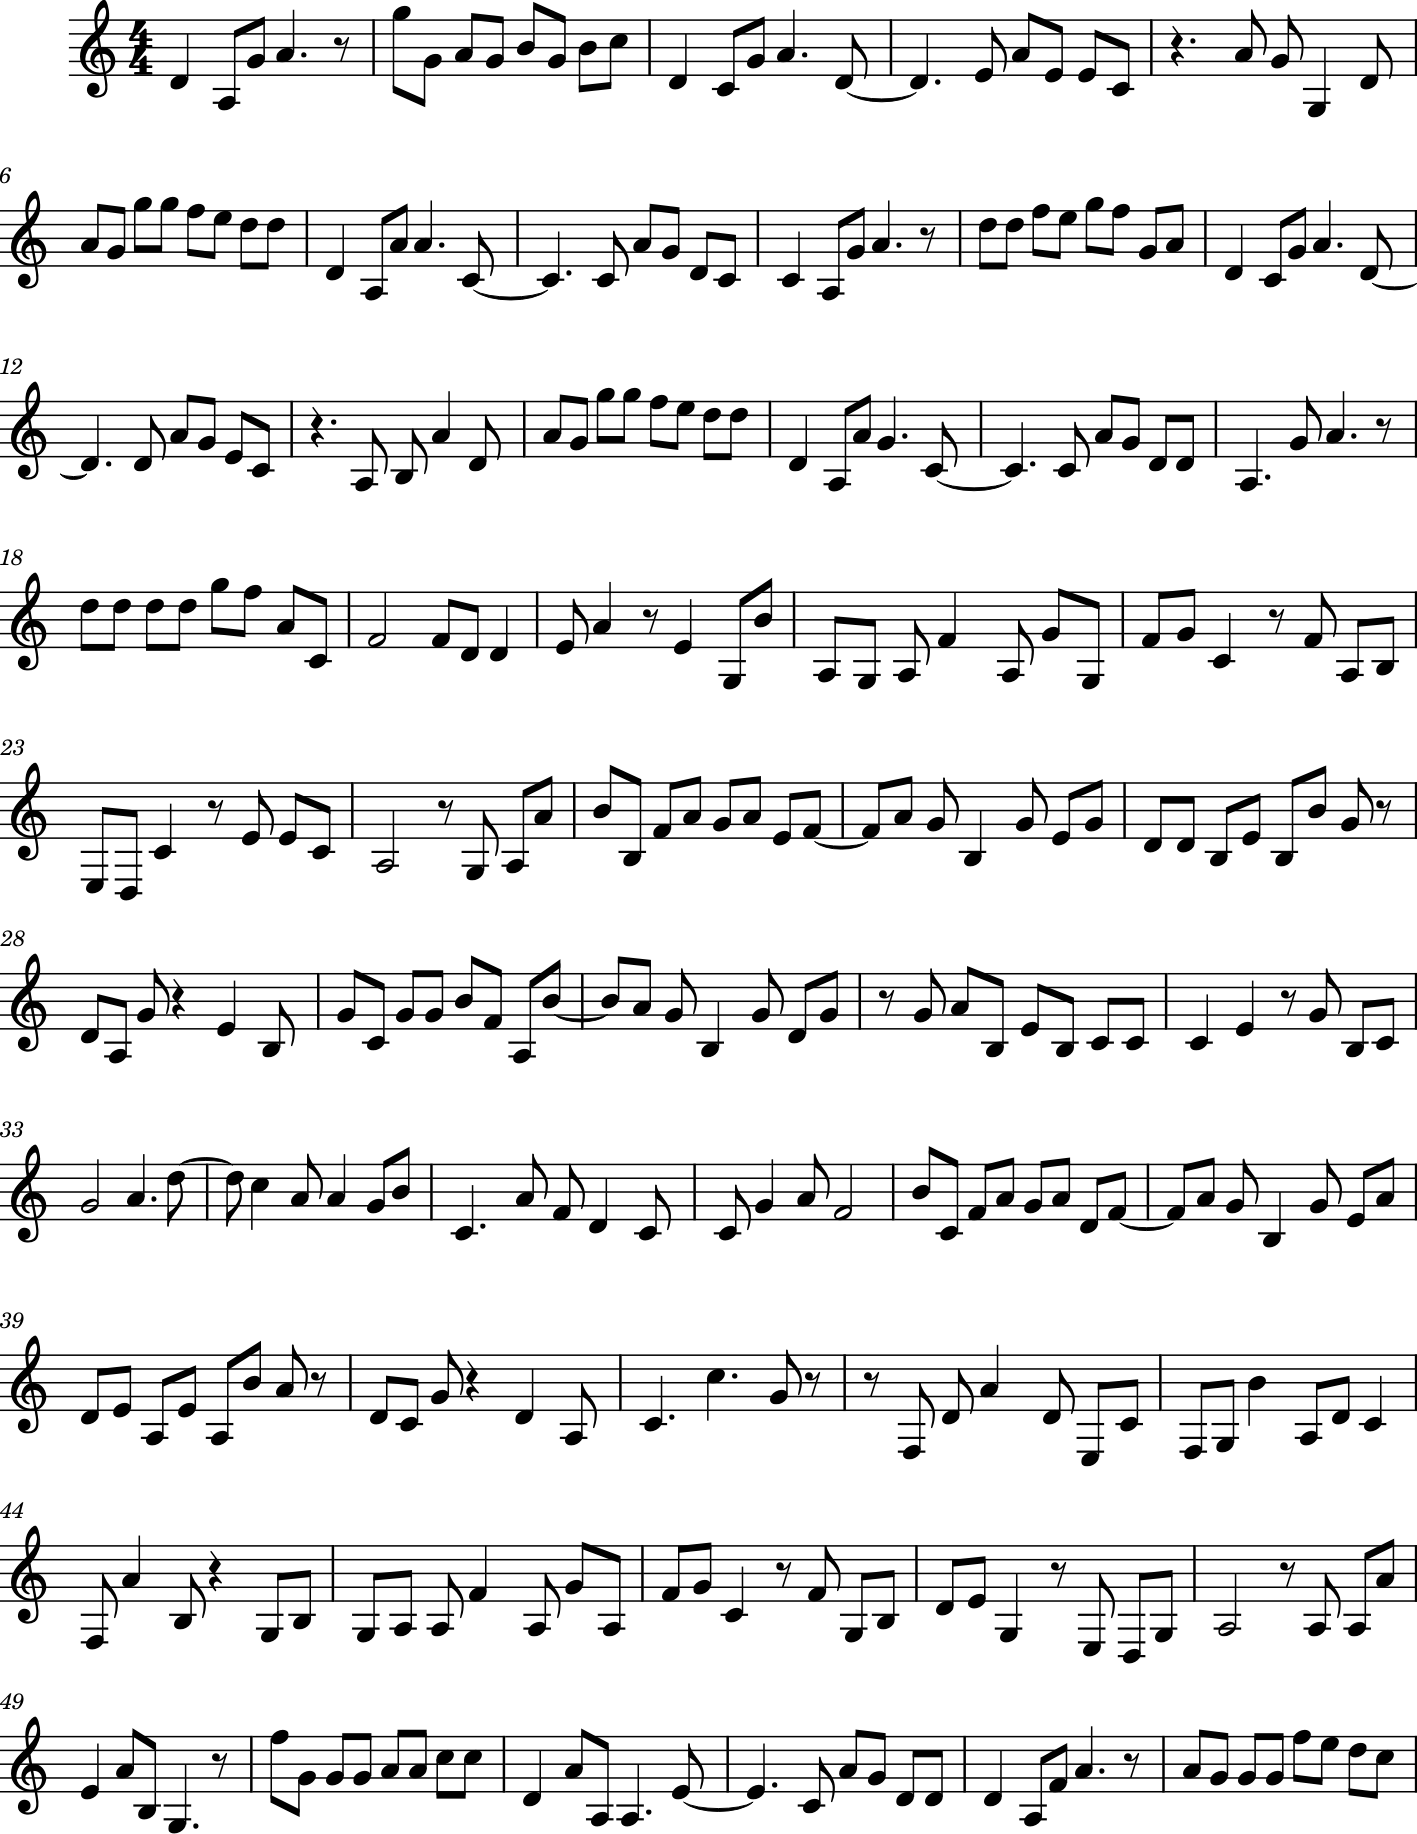

In [30]:
print(population[26:34].shape)
A=population[:].ravel()
print(A.shape)

ms=single_vec_to_str(clamp_Cmaj(A)).split(" ")
score=txt2music(ms)

score.show("midi")
score.show()


In [31]:
score.write("musicxml.pdf")

WindowsPath('C:/Users/yingj/AppData/Local/Temp/music21/tmpsquz69oi.pdf')